# Import Libraries

In [89]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import yfinance as yf
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential, layers, losses, optimizers

# Get Stock Data from Yahoo Finance

In [67]:
ticker = yf.Ticker("TSLA")
data = ticker.history(period = "1d", start = "2000-01-01")
data = data["Close"]
data

Date
2010-06-29       4.778000
2010-06-30       4.766000
2010-07-01       4.392000
2010-07-02       3.840000
2010-07-06       3.222000
                 ...     
2022-04-08    1025.489990
2022-04-11     975.929993
2022-04-12     986.950012
2022-04-13    1022.369995
2022-04-14     987.385010
Name: Close, Length: 2971, dtype: float64

# Data Processing
## Get Sliding Windows

In [110]:
window = 10
X = []
for i in tqdm(np.arange(window, len(data))):
    X.append(list(data[i - window: i]))
X = np.array(X, dtype = np.float32)

X

100%|██████████| 2961/2961 [00:00<00:00, 8931.23it/s]


array([[   4.778,    4.766,    4.392, ...,    3.48 ,    3.41 ,    3.628],
       [   4.766,    4.392,    3.84 , ...,    3.41 ,    3.628,    3.968],
       [   4.392,    3.84 ,    3.222, ...,    3.628,    3.968,    3.978],
       ...,
       [1099.57 , 1093.99 , 1077.6  , ..., 1057.26 , 1025.49 ,  975.93 ],
       [1093.99 , 1077.6  , 1084.59 , ..., 1025.49 ,  975.93 ,  986.95 ],
       [1077.6  , 1084.59 , 1145.45 , ...,  975.93 ,  986.95 , 1022.37 ]],
      dtype=float32)

## y

In [111]:
y = np.array(data, dtype = np.float32)[window:]
y

array([   3.968,    3.978,    4.128, ...,  986.95 , 1022.37 ,  987.385],
      dtype=float32)

## Split Train and Test Dataset

In [112]:
X_train = X[:-252]
X_test = X[-252:]

y_train = y[:-252]
y_test = y[-252:]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2709, 10) (252, 10) (2709,) (252,)


# Create Model

In [113]:
model = Sequential([
    layers.InputLayer(input_shape = (window)),
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation = "relu")
])

print(model.summary())

model.compile(
    loss = losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               1408      
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________
None


# Train the Modle

In [114]:
history = model.fit(
    X_train, y_train,
    epochs = 100, batch_size = 32, verbose = 1,
    validation_data = (X_test, y_test)
)

Epoch 1/100
85/85 [==============================] - 1s 4ms/step - loss: 1338.3330 - val_loss: 7060.2930
Epoch 2/100
85/85 [==============================] - 0s 4ms/step - loss: 514.9675 - val_loss: 3146.6548
Epoch 3/100
85/85 [==============================] - 0s 3ms/step - loss: 351.2722 - val_loss: 2023.9604
Epoch 4/100
85/85 [==============================] - 0s 3ms/step - loss: 403.6927 - val_loss: 6389.2827
Epoch 5/100
85/85 [==============================] - 0s 3ms/step - loss: 369.0488 - val_loss: 1850.3751
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 344.3450 - val_loss: 2281.9365
Epoch 7/100
85/85 [==============================] - 0s 3ms/step - loss: 373.9839 - val_loss: 1578.2019
Epoch 8/100
85/85 [==============================] - 0s 3ms/step - loss: 518.5601 - val_loss: 1710.9248
Epoch 9/100
85/85 [==============================] - 0s 5ms/step - loss: 415.4766 - val_loss: 1997.7860
Epoch 10/100
85/85 [==============================] - 0s 4ms/st

# Model Evaluation

In [115]:
pred = model.predict(X_test, verbose = 1)
pred = pred.reshape(-1)
pred

8/8 [==============================] - 0s 2ms/step


array([ 719.28143,  695.1167 ,  697.27295,  712.2652 ,  704.4715 ,
        706.82135,  710.1778 ,  691.35455,  681.25555,  667.0291 ,
        678.19934,  672.21674,  661.9218 ,  658.5733 ,  645.62714,
        648.9554 ,  628.228  ,  615.5761 ,  595.53345,  575.2862 ,
        579.52795,  571.39874,  569.9089 ,  557.59515,  559.95593,
        560.2866 ,  572.6869 ,  584.50476,  592.88104,  605.4094 ,
        604.237  ,  605.3253 ,  594.79767,  570.2933 ,  575.87946,
        581.4891 ,  584.36536,  583.7459 ,  585.71985,  586.4472 ,
        590.4672 ,  585.3863 ,  586.53284,  592.50366,  596.7097 ,
        600.93976,  604.012  ,  623.1894 ,  644.91986,  648.8581 ,
        664.3907 ,  662.71906,  657.15485,  658.2297 ,  657.71875,
        648.0527 ,  633.74133,  633.5821 ,  634.3466 ,  649.6794 ,
        650.14923,  637.92377,  632.81494,  622.67236,  625.1938 ,
        634.32245,  634.9636 ,  631.034  ,  623.6431 ,  628.9631 ,
        625.27484,  624.7105 ,  646.0424 ,  657.0504 ,  675.62

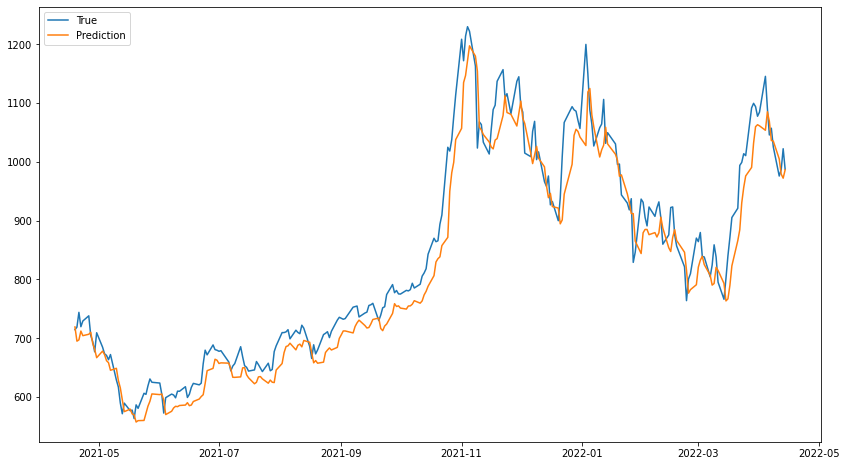

In [118]:
date = data.index[-252:]

plt.figure(figsize = (14, 8))

plt.plot(date, y_test, label = "True")
plt.plot(date, pred, label = "Prediction")
plt.legend(loc = "upper left")

plt.show()